# Analyse des données de ventes

In [4]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
Sales_Data = pd.read_excel('Sales_Data.xlsx')

In [3]:
Sales_Data.head(5)

,N° Cmde,Date Cdme,N° Client,Nom Client,Adresse,Ville,Departement,Code Postal,Provinces,Commerciaux,...,Ship ZIP/Postal Code,Ship Country/Region,Type Paiment,Nom Produit,Categories,Prix Unitaire,Quantité,Revenue,Frais Expédition,JOURS
0,1001,2021-01-27,27,Company AA,789 27th Street,Las Vegas,NV,99999,Brittany,Mariya Sergienko,...,99999,FRANCE,Chèque,Beer,Beverages,14.0,49,686.0,66.5420,27
1,1002,2021-01-27,27,Company AA,789 27th Street,Las Vegas,NV,99999,Brittany,Mariya Sergienko,...,99999,FRANCE,Chèque,Dried Plums,Dried Fruit & Nuts,3.5,47,164.5,16.6145,27
2,1003,2021-01-04,4,Company D,123 4th Street,New York,NY,99999,Grand Est,Andrew Cencini,...,99999,FRANCE,CB,Dried Pears,Dried Fruit & Nuts,30.0,69,2070.0,198.7200,4
3,1004,2021-01-05,4,Company D,123 4th Street,New York,NY,99999,Grand Est,Andrew Cencini,...,99999,FRANCE,CB,Dried Apples,Dried Fruit & Nuts,53.0,89,4717.0,448.1150,5
4,1005,2021-01-04,4,Company D,123 4th Street,New York,NY,99999,Grand Est,Andrew Cencini,...,99999,FRANCE,CB,Dried Plums,Dried Fruit & Nuts,3.5,11,38.5,3.7345,4


In [95]:
Sales_Data.describe()

,N° Cmde,N° Client,Code Postal,Ship ZIP/Postal Code,Prix Unitaire,Quantité,Revenue,Frais Expédition,JOURS
count,369.000000,369.000000,369.0,369.0,369.000000,369.000000,369.000000,369.000000,369.000000
mean,1212.151762,11.934959,99999.0,99999.0,21.251436,55.804878,1178.959783,118.328177,12.533875
std,126.400067,9.352755,0.0,0.0,16.932708,27.096644,1164.676660,116.471099,9.620210
min,1001.000000,1.000000,99999.0,99999.0,0.000000,0.000000,0.000000,3.734500,1.000000
25%,1102.000000,6.000000,99999.0,99999.0,9.650000,33.000000,368.000000,38.016000,6.000000
50%,1216.000000,9.000000,99999.0,99999.0,14.000000,55.000000,848.000000,85.470000,9.000000
75%,1324.000000,25.000000,99999.0,99999.0,34.800000,80.000000,1458.000000,144.035200,25.000000
max,1432.000000,29.000000,99999.0,99999.0,81.000000,100.000000,7938.000000,769.986000,31.000000


In [6]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   N° Cmde               369 non-null    int64         
 1   Date Cdme             369 non-null    datetime64[ns]
 2   N° Client             369 non-null    int64         
 3   Nom Client            369 non-null    object        
 4   Adresse               369 non-null    object        
 5   Ville                 369 non-null    object        
 6   Departement           369 non-null    object        
 7   Code Postal           369 non-null    int64         
 8   Provinces             369 non-null    object        
 9   Commerciaux           369 non-null    object        
 10  Region                369 non-null    object        
 11  Shipped Date          291 non-null    datetime64[ns]
 12  Shipper Name          330 non-null    object        
 13  Ship Name           

In [91]:
Sales_Data.isnull().sum(axis=0)

N° Cmde                   0
Date Cdme                 0
N° Client                 0
Nom Client                0
Adresse                   0
Ville                     0
Departement               0
Code Postal               0
Provinces                 0
Commerciaux               0
Region                    0
Shipped Date             78
Shipper Name             39
Ship Name                 0
Ship Address              0
Ship City                 0
Ship State                0
Ship ZIP/Postal Code      0
Ship Country/Region       0
Type Paiment            102
Nom Produit               3
Categories                3
Prix Unitaire             0
Quantité                  0
Revenue                   0
Frais Expédition          0
JOURS                     0
dtype: int64

In [8]:
Missed_values = Sales_Data[Sales_Data.isnull().any(axis=1)]
Missed_values

,N° Cmde,Date Cdme,N° Client,Nom Client,Adresse,Ville,Departement,Code Postal,Provinces,Commerciaux,...,Ship ZIP/Postal Code,Ship Country/Region,Type Paiment,Nom Produit,Categories,Prix Unitaire,Quantité,Revenue,Frais Expédition,JOURS
14,1050,2021-02-04,4,Company D,123 4th Street,New York,NY,99999,Grand Est,Andrew Cencini,...,99999,FRANCE,NaN,Gnocchi,Pasta,38.00,96,3648.00,346.56000,4
15,1016,2021-01-07,7,Company G,123 7th Street,Boise,ID,99999,Normandie,Nancy Freehafer,...,99999,FRANCE,NaN,Coffee,Beverages,46.00,24,1104.00,110.40000,7
21,1022,2021-01-01,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,...,99999,FRANCE,NaN,Chai,Beverages,18.00,42,756.00,75.60000,1
22,1023,2021-01-01,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,...,99999,FRANCE,NaN,Coffee,Beverages,46.00,58,2668.00,269.46800,1
23,1024,2021-01-01,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,...,99999,FRANCE,NaN,Green Tea,Beverages,2.99,67,200.33,20.03300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1389,2021-12-01,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,...,99999,FRANCE,NaN,Chai,Beverages,18.00,99,1782.00,174.63600,1
334,1390,2021-12-01,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,...,99999,FRANCE,NaN,Coffee,Beverages,46.00,89,4094.00,388.93000,1
335,1391,2021-12-01,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,...,99999,FRANCE,NaN,Green Tea,Beverages,2.99,64,191.36,19.51872,1
357,1421,2021-12-01,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,...,99999,FRANCE,NaN,Crab Meat,Canned Meat,18.40,45,828.00,81.14400,1


In [9]:
Missed_values.isnull().all()

N° Cmde                 False
Date Cdme               False
N° Client               False
Nom Client              False
Adresse                 False
Ville                   False
Departement             False
Code Postal             False
Provinces               False
Commerciaux             False
Region                  False
Shipped Date            False
Shipper Name            False
Ship Name               False
Ship Address            False
Ship City               False
Ship State              False
Ship ZIP/Postal Code    False
Ship Country/Region     False
Type Paiment            False
Nom Produit             False
Categories              False
Prix Unitaire           False
Quantité                False
Revenue                 False
Frais Expédition        False
JOURS                   False
dtype: bool

In [11]:
Sales_Data.describe()

,N° Cmde,N° Client,Code Postal,Ship ZIP/Postal Code,Prix Unitaire,Quantité,Revenue,Frais Expédition,JOURS
count,369.000000,369.000000,369.0,369.0,369.000000,369.000000,369.000000,369.000000,369.000000
mean,1212.151762,11.934959,99999.0,99999.0,21.251436,55.804878,1178.959783,118.328177,12.533875
std,126.400067,9.352755,0.0,0.0,16.932708,27.096644,1164.676660,116.471099,9.620210
min,1001.000000,1.000000,99999.0,99999.0,0.000000,0.000000,0.000000,3.734500,1.000000
25%,1102.000000,6.000000,99999.0,99999.0,9.650000,33.000000,368.000000,38.016000,6.000000
50%,1216.000000,9.000000,99999.0,99999.0,14.000000,55.000000,848.000000,85.470000,9.000000
75%,1324.000000,25.000000,99999.0,99999.0,34.800000,80.000000,1458.000000,144.035200,25.000000
max,1432.000000,29.000000,99999.0,99999.0,81.000000,100.000000,7938.000000,769.986000,31.000000


In [12]:
Sales_Data.index
Sales_Data = Sales_Data.set_index('Date Cdme')
Sales_Data.sort_index(inplace=True)
Sales_Data.head(5)

,N° Cmde,N° Client,Nom Client,Adresse,Ville,Departement,Code Postal,Provinces,Commerciaux,Region,...,Ship ZIP/Postal Code,Ship Country/Region,Type Paiment,Nom Produit,Categories,Prix Unitaire,Quantité,Revenue,Frais Expédition,JOURS
Date Cdme,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1023,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,Nord,...,99999,FRANCE,NaN,Coffee,Beverages,46.00,58,2668.00,269.46800,1
2021-01-01,1024,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,Nord,...,99999,FRANCE,NaN,Green Tea,Beverages,2.99,67,200.33,20.03300,1
2021-01-01,1022,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,Nord,...,99999,FRANCE,NaN,Chai,Beverages,18.00,42,756.00,75.60000,1
2021-01-03,1011,3,Company C,123 3rd Street,Los Angelas,CA,99999,Nouvelle Aquitaine,Mariya Sergienko,Ouest,...,99999,FRANCE,Espèce,Clam Chowder,Soups,9.65,91,878.15,92.20575,3
2021-01-04,1003,4,Company D,123 4th Street,New York,NY,99999,Grand Est,Andrew Cencini,Est,...,99999,FRANCE,CB,Dried Pears,Dried Fruit & Nuts,30.00,69,2070.00,198.72000,4


In [15]:
Sales_Data['Month'] = Sales_Data.index.month_name()

In [17]:
Sales_Data.groupby('Month')["Revenue"].sum().sort_values(ascending=False)

Month
December     66642.78
June         55601.61
October      53033.59
May          34307.05
January      32907.84
September    31949.97
November     31773.43
March        30852.60
August       29921.46
July         27318.54
April        20771.79
February     19955.50
Name: Revenue, dtype: float64

In [19]:
order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
Sales_Data.groupby('Month')["Revenue"].sum().loc[order]

Month
January      32907.84
February     19955.50
March        30852.60
April        20771.79
May          34307.05
June         55601.61
July         27318.54
August       29921.46
September    31949.97
October      53033.59
November     31773.43
December     66642.78
Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Revenue par Mois')

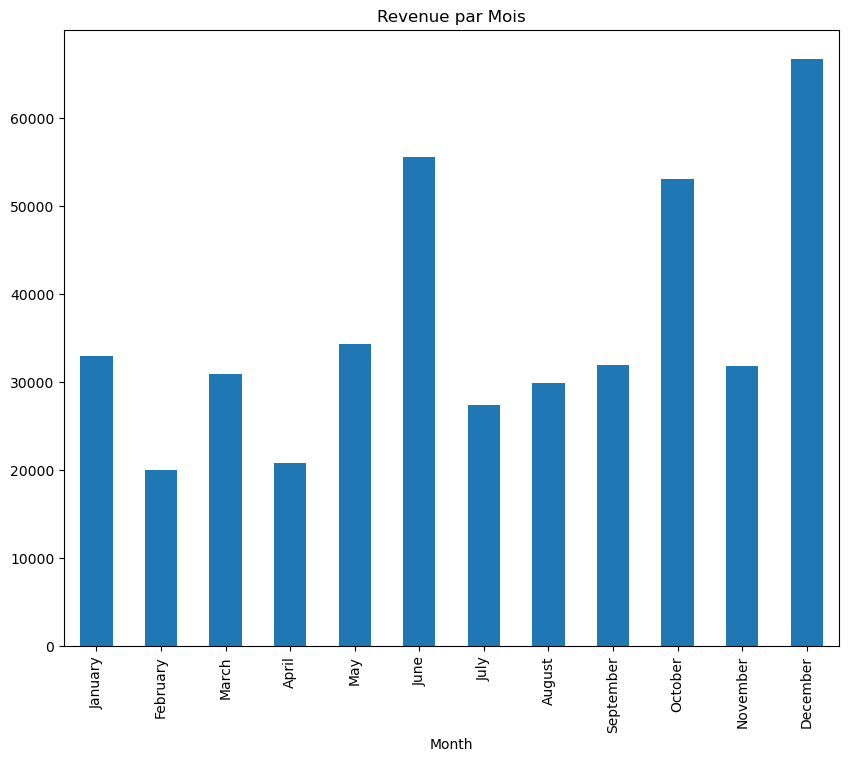

In [20]:
Sales_Data.groupby('Month')["Revenue"].sum().loc[order].plot.bar(figsize=(10, 8))
plt.title("Revenue par Mois")

Décembre est le mois avec le plus de ventes et le revenue est de 66642.78

In [25]:
Sales_Data['Ville'].unique()

array(['Seattle', 'Los Angelas', 'New York', 'Milwaukee', 'Boise',
       'Portland', 'Salt Lake City', 'Chicago', 'Miami', 'Las Vegas',
       'Memphis', 'Denver'], dtype=object)

In [97]:
Sales_Data.groupby('Ville').sum()["Revenue"].sort_values(ascending=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11056\781858531.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sales_Data.groupby('Ville').sum()["Revenue"].sort_values(ascending=False)


Ville
New York          67180.50
Portland          50198.35
Miami             50145.33
Memphis           43703.00
Chicago           41095.01
Milwaukee         37418.00
Seattle           36839.99
Salt Lake City    32530.60
Los Angelas       27005.38
Boise             17204.00
Denver            16350.50
Las Vegas         15365.50
Name: Revenue, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11056\965159857.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sales_Data.groupby('Ville').sum()["Revenue"].sort_values(ascending=False).plot.barh(figsize=(10, 8))


Text(0.5, 1.0, 'Revenue par ville')

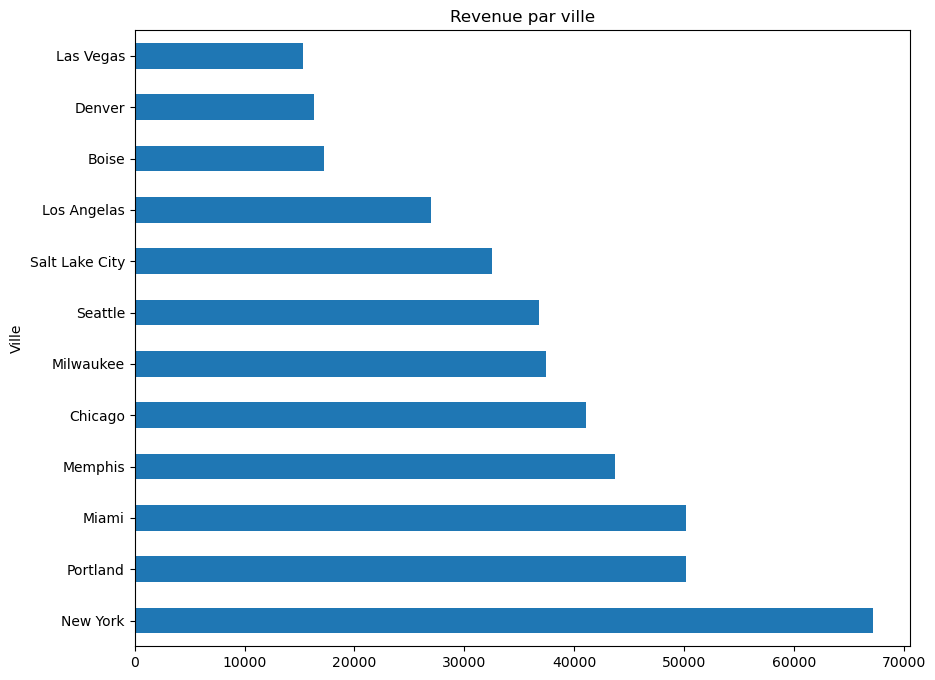

In [28]:
Sales_Data.groupby('Ville').sum()["Revenue"].sort_values(ascending=False).plot.barh(figsize=(10, 8)) 
plt.title("Revenue par ville")

On a fait un meilleur chiffre d'affaire à New york

In [30]:
Revenue_Ville = Sales_Data.groupby('Ville').sum()["Revenue"].sort_values(ascending=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11056\298390823.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Revenue_Ville = Sales_Data.groupby('Ville').sum()["Revenue"].sort_values(ascending=False)


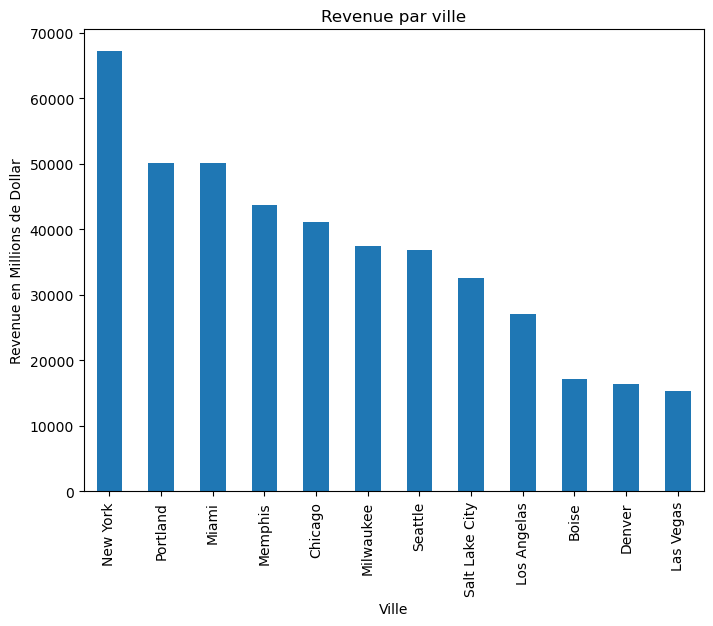

In [31]:
Revenue_Ville.plot(kind='bar', figsize=(8, 6))
plt.ylabel('Revenue en Millions de Dollar')
plt.title('Revenue par ville')
plt.show()

Le produit le plus vendu

In [36]:
Sales_Data.head()

,N° Cmde,N° Client,Nom Client,Adresse,Ville,Departement,Code Postal,Provinces,Commerciaux,Region,...,Ship Country/Region,Type Paiment,Nom Produit,Categories,Prix Unitaire,Quantité,Revenue,Frais Expédition,JOURS,Month
Date Cdme,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1023,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,Nord,...,FRANCE,NaN,Coffee,Beverages,46.00,58,2668.00,269.46800,1,January
2021-01-01,1024,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,Nord,...,FRANCE,NaN,Green Tea,Beverages,2.99,67,200.33,20.03300,1,January
2021-01-01,1022,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,Nord,...,FRANCE,NaN,Chai,Beverages,18.00,42,756.00,75.60000,1,January
2021-01-03,1011,3,Company C,123 3rd Street,Los Angelas,CA,99999,Nouvelle Aquitaine,Mariya Sergienko,Ouest,...,FRANCE,Espèce,Clam Chowder,Soups,9.65,91,878.15,92.20575,3,January
2021-01-04,1003,4,Company D,123 4th Street,New York,NY,99999,Grand Est,Andrew Cencini,Est,...,FRANCE,CB,Dried Pears,Dried Fruit & Nuts,30.00,69,2070.00,198.72000,4,January


In [37]:
Sales_Data.groupby('Nom Produit')['Quantité'].sum().sort_values(ascending=False)

Nom Produit
Clam Chowder              1744
Curry Sauce               1725
Coffee                    1641
Green Tea                 1589
Chocolate                 1399
Crab Meat                 1384
Chocolate Biscuits Mix    1383
Beer                      1289
Dried Plums               1057
Mozzarella                 952
Cajun Seasoning            684
Chai                       683
Scones                     633
Olive Oil                  624
Ravioli                    567
Syrup                      523
Marmalade                  511
Almonds                    444
Long Grain Rice            412
Boysenberry Spread         406
Dried Pears                344
Gnocchi                    240
Dried Apples               180
Fruit Cocktail             178
Name: Quantité, dtype: int64

In [42]:
Quantité_produits = pd.DataFrame(Sales_Data.groupby('Nom Produit')['Quantité'].sum().sort_values(ascending=False))

In [43]:
Quantité_produits

,Quantité
Nom Produit,
Clam Chowder,1744
Curry Sauce,1725
Coffee,1641
Green Tea,1589
Chocolate,1399
Crab Meat,1384
Chocolate Biscuits Mix,1383
Beer,1289
Dried Plums,1057


Text(0.5, 1.0, 'Quantité par Produit')

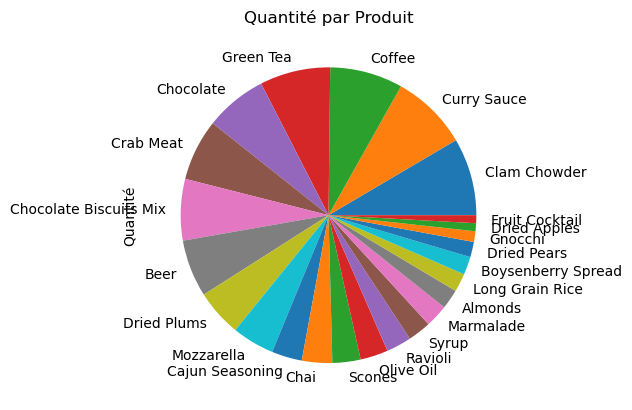

In [66]:
Sales_Data.groupby('Nom Produit')['Quantité'].sum().sort_values(ascending=False).plot.pie()
plt.title("Quantité par Produit")

In [53]:
Quantité_produits

,Quantité
Nom Produit,
Clam Chowder,1744
Curry Sauce,1725
Coffee,1641
Green Tea,1589
Chocolate,1399
Crab Meat,1384
Chocolate Biscuits Mix,1383
Beer,1289
Dried Plums,1057


Text(0.5, 1.0, 'Quantité par produit')

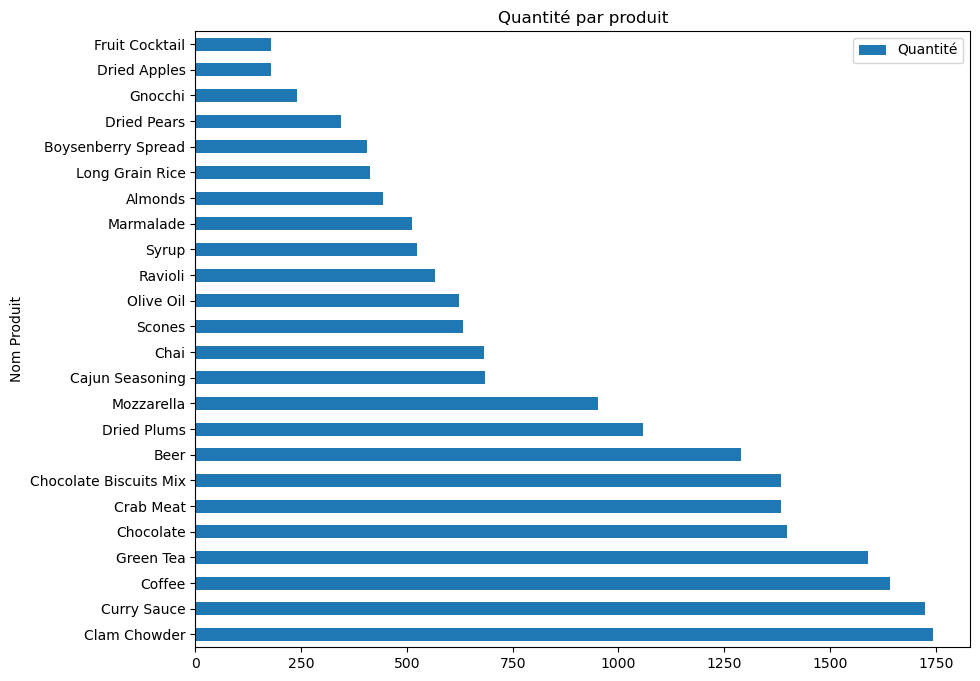

In [98]:
Quantité_produits.plot.barh(figsize=(10, 8)) 
plt.title("Quantité par produit")

In [92]:
Quantité_produits[:1]

,Quantité
Nom Produit,
Clam Chowder,1744


Le produit le plus vendu est le Clam Chowder (Quantité = 1744)

In [60]:
Sales_Data.head()

,N° Cmde,N° Client,Nom Client,Adresse,Ville,Departement,Code Postal,Provinces,Commerciaux,Region,...,Ship Country/Region,Type Paiment,Nom Produit,Categories,Prix Unitaire,Quantité,Revenue,Frais Expédition,JOURS,Month
Date Cdme,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1023,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,Nord,...,FRANCE,NaN,Coffee,Beverages,46.00,58,2668.00,269.46800,1,January
2021-01-01,1024,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,Nord,...,FRANCE,NaN,Green Tea,Beverages,2.99,67,200.33,20.03300,1,January
2021-01-01,1022,1,Company A,123 1st Street,Seattle,WA,99999,Normandie,Nancy Freehafer,Nord,...,FRANCE,NaN,Chai,Beverages,18.00,42,756.00,75.60000,1,January
2021-01-03,1011,3,Company C,123 3rd Street,Los Angelas,CA,99999,Nouvelle Aquitaine,Mariya Sergienko,Ouest,...,FRANCE,Espèce,Clam Chowder,Soups,9.65,91,878.15,92.20575,3,January
2021-01-04,1003,4,Company D,123 4th Street,New York,NY,99999,Grand Est,Andrew Cencini,Est,...,FRANCE,CB,Dried Pears,Dried Fruit & Nuts,30.00,69,2070.00,198.72000,4,January


In [69]:
Sales_Data.groupby('Commerciaux')["Quantité"].sum().sort_values(ascending=False)

Commerciaux
Anne Larsen         4954
Nancy Freehafer     4309
Laura Giussani      3226
Mariya Sergienko    2102
Michael Neipper     1916
Andrew Cencini      1807
Robert Zare         1411
Jan Kotas            867
Name: Quantité, dtype: int64

In [70]:
Top_Commerciaux = Sales_Data.groupby('Commerciaux')["Quantité"].sum().sort_values(ascending=False)

In [80]:
Top_Commerciaux = pd.DataFrame(Sales_Data.groupby('Commerciaux')["Quantité"].sum().sort_values(ascending=False))

In [81]:
Top_Commerciaux

,Quantité
Commerciaux,
Anne Larsen,4954
Nancy Freehafer,4309
Laura Giussani,3226
Mariya Sergienko,2102
Michael Neipper,1916
Andrew Cencini,1807
Robert Zare,1411
Jan Kotas,867


<Axes: ylabel='Commerciaux'>

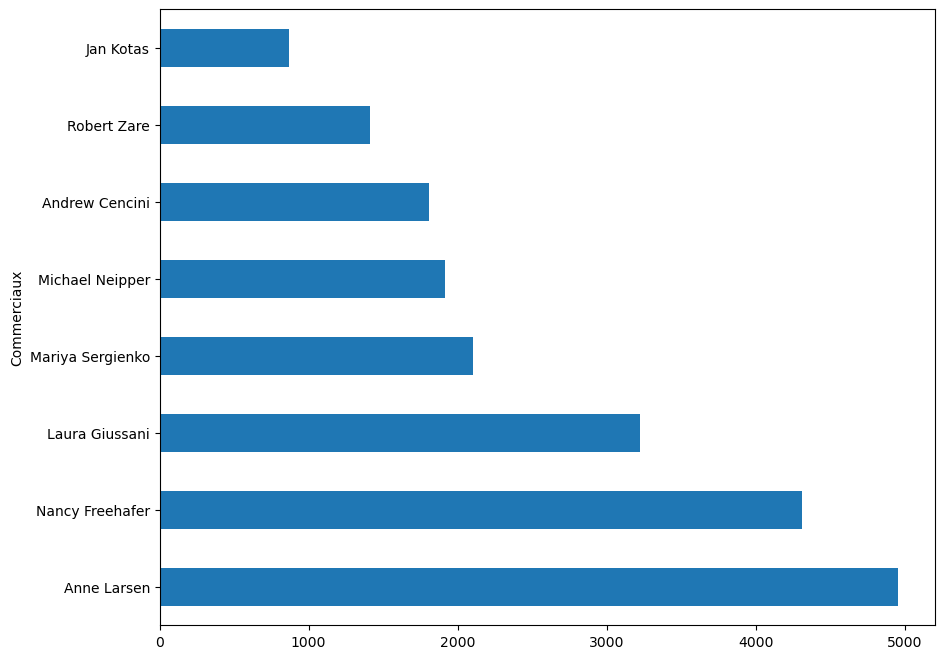

In [63]:
Sales_Data.groupby('Commerciaux')["Quantité"].sum().sort_values(ascending=False).plot.barh(figsize=(10, 8))

In [93]:
Top_3 = pd.DataFrame(Top_Commerciaux[:3])


In [94]:
Top_3

,Quantité
Commerciaux,
Anne Larsen,4954
Nancy Freehafer,4309
Laura Giussani,3226


Les trois premiers commerciaux ayant vendu plus de produits sont: Anne Larsen(4954), Nancy Freehafer(4309), Laura Giussani(3226). 